# CVAI - Übung: Farben

### Detektion mit Farben

In unserem SkinApp Projekt befassen wir uns mit der Erkennung von Hautkrankheiten, zum Beispiel auf Händen. Als erstes muss dabei die Handfläche vom Hintergrund getrennt werden. Damit dies einfacher geht, haben wir eine Photobox entwickelt, die die Hände vor grünem Hintergrund aufnimmt. Sie sollen nun untersuchen, ob es damit tatsächlich einfacher ist, die Handflächen oder Handrückseiten zu finden.





In [1]:
# OpenCV needs to be included first

import cv2
import numpy as np

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline
# resolution of images in figure
mpl.rcParams['figure.dpi']= 200
# figure size in inches
mpl.rcParams["figure.figsize"] = [10,5]

path = '/exchange/cvai/images/'

### Aufgabe 1: Handsegmentierung

Als erstes sollen sie versuchen, die Handflächen mittels der Farbe der Haut zu detektieren. Dazu ist es möglicherweise hilfreich, das Bild in einen anderen Farbraum zu transferieren. Für Hautsegmentierung könnte sich zum Beispiel der YCrCb- oder der HSV-Farbraum eignen. Stellen Sie das Bild in diesen Farbräumen dar und suchen Sie dann, entsprechende Schwellwerte um eine binäre Maske der Hand zu erstellen. Für Schwellwerte stehen in OpenCV eigentlich die Funktionen `cv.threshold()` und `cv2.inRange()` zur Verfügung, für einfache Fälle ist oft auch ein Vergleich direkt in numpy möglich.

In [9]:
image_grey_back = cv2.imread (path + 'hand_grey_small.png')
image_grey_back = cv2.cvtColor (image_grey_back, cv2.COLOR_BGR2RGB)

# simple threshold in RGB

min = np.array ([150, 0, 0])
max = np.array ([255, 140, 150])

skin_image = cv2.inRange (image_grey_back, min, max)

plt.subplot (1, 2, 1); plt.imshow (image_grey_back)
plt.subplot (1, 2, 2); plt.imshow (skin_image, cmap = 'gray')

Konvertieren sie nun das Bild in ein anderes Farbsystem und versuchen sie, dort einen besseren Schwellwert zu erhalten.

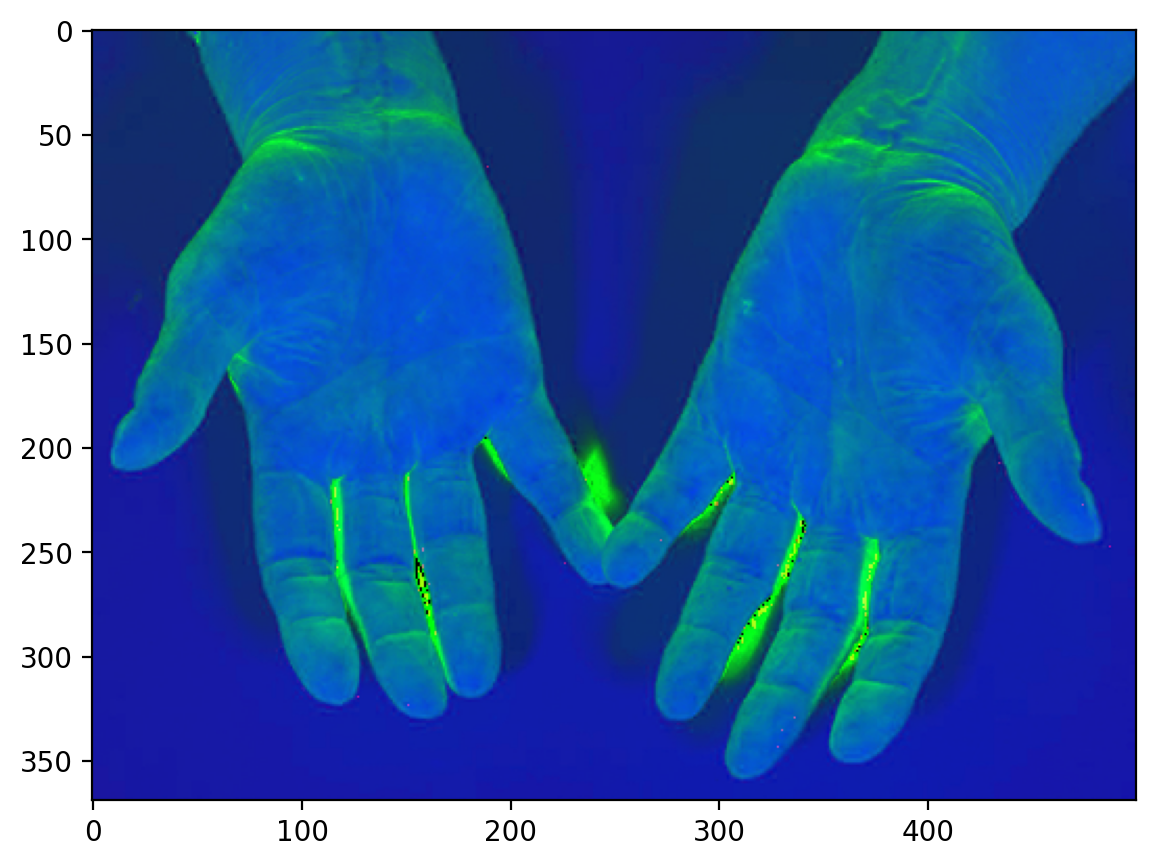

In [31]:
image_grey_back = cv2.imread (path + 'hand_grey_small.png')
image_grey_back = cv2.cvtColor (image_grey_back, cv2.COLOR_BGR2HSV)
plt.imshow(image_grey_back, cmap='gray')

In [42]:
# ROI (Region of Interest) auswählen
x, y, w, h = 120, 120, 30, 30  # Bereich anpassen (x, y, Breite, Höhe)
roi = image_grey_back[y:y+h, x:x+w]

# Min- und Max-HSV-Werte bestimmen
h_min, s_min, v_min = np.min(roi, axis=(0, 1))
h_max, s_max, v_max = np.max(roi, axis=(0, 1))

print(f"HSV min: {[h_min, s_min, v_min]}")
print(f"HSV max: {[h_max, s_max, v_max]}")

HSV min: [np.uint8(3), np.uint8(74), np.uint8(183)]
HSV max: [np.uint8(8), np.uint8(110), np.uint8(225)]


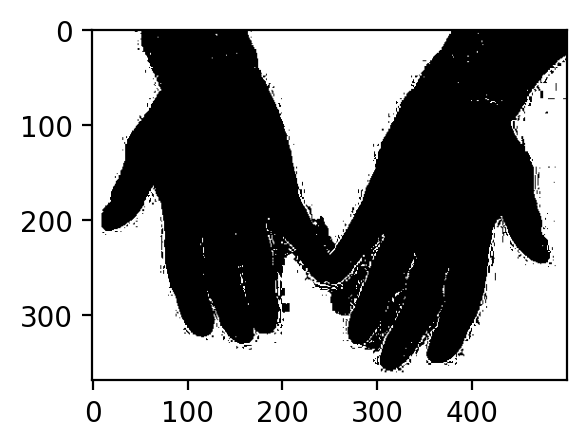

In [63]:
def segment(image_name, min_hue=12, max_hue=12, min_sat=67, max_sat=70, min_val=155, max_val=165):
    hgs = cv2.imread (str(path + image_name))
    image_hsv = cv2.cvtColor(hgs, cv2.COLOR_BGR2HSV)
    
    saturation = image_hsv[:, :, 1]
    value = image_hsv[:, :, 2]
    hue = image_hsv[:, :, 0]
    
    _, filtered_image_sat  = cv2.threshold(saturation, min_sat, max_sat, cv2.THRESH_BINARY)
    _, filtered_image_value = cv2.threshold(value, min_val, max_val, cv2.THRESH_BINARY)
    _, filtered_image_hue = cv2.threshold(hue, min_hue, max_hue, cv2.THRESH_BINARY)
    return filtered_image_hue, filtered_image_sat, filtered_image_value
    
hue,_,_ = segment('hand_grey_small.png')
image_hsv = hue
plt.subplot(2,2,2); plt.imshow(hue, cmap='grey')


In [64]:
assert image_hsv is not None
#plt.imshow(image_hsv)

### Aufgabe 2: Hintergrundsegmentierung

Im folgenden wird ein Bild mit grünem Hintergrund geladen. Führen Sie darauf die gleiche Segmentierung wie beim oberen Bild durch und stellen Sie diese dar.

In [65]:
image_green_back = cv2.imread (path + 'hand_green_small.png')
image_green_back = cv2.cvtColor (image_green_back, cv2.COLOR_BGR2RGB)
plt.imshow (image_green_back)

Segmentieren Sie nun statt der Haut den grünen Hintergrund. Können Sie damit eine bessere Unterscheidung zwischen Hand und Hintergrund erhalten? Stellen sie die beiden Bilder nebeneinander dar.

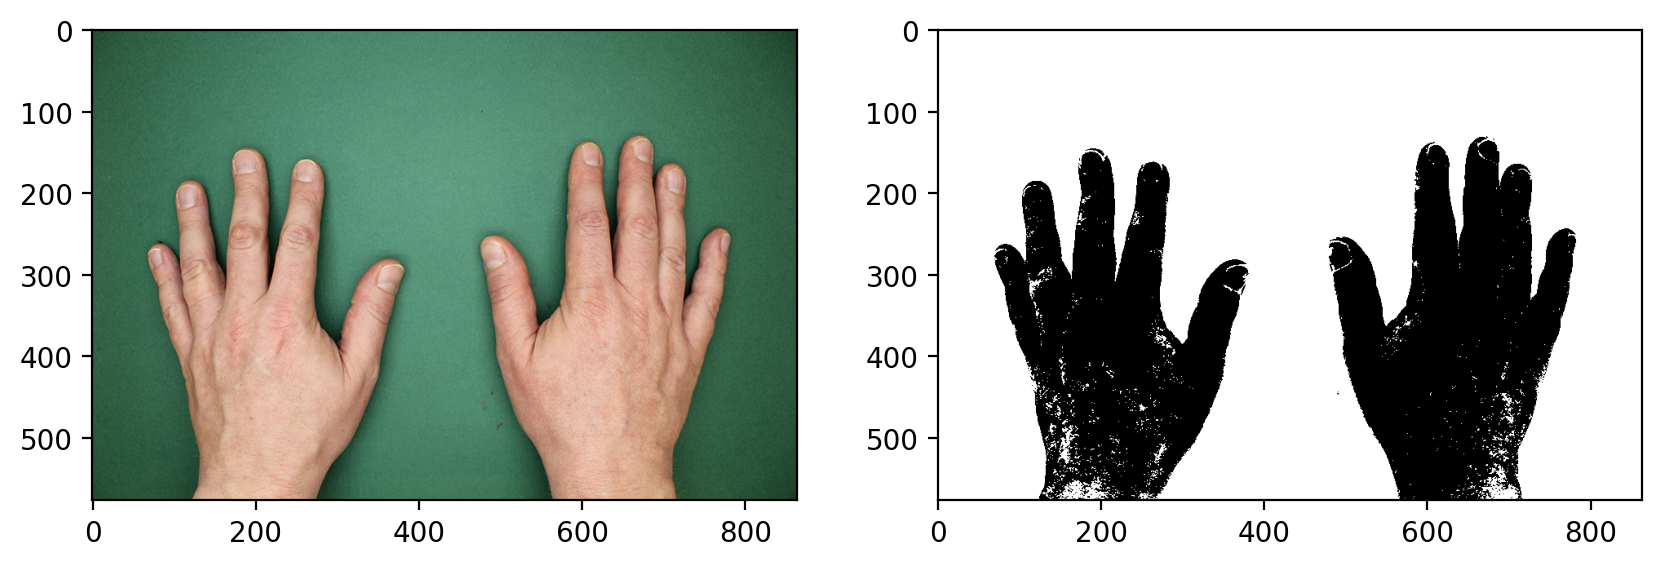

In [66]:
hsv = None

# YOUR CODE HERE
hsv,_,_ = segment('hand_green_small.png')


plt.subplot (1, 2, 1); plt.imshow (image_green_back, cmap = 'gray')
plt.subplot (1, 2, 2); plt.imshow (hsv, cmap = 'gray')

In [67]:
assert hsv is not None
#plt.imshow(hsv)

### Aufgabe 3: Bluescreen

Blue Screening wird in der Filmindustrie verwendet, um Regionen in einem Bild (zum Beispiel einen blauen Hintergrund) durch ein anderes Bild zu ersetzen.

Entwickeln sie ein Program, das zwei Bilder mit Hilfe dieser Technik überlagert. Gehen Sie dazu wie folgt vor:

* Berechnen sie für jedes Pixel die Transparenz α aufgrund des Farbwertes des ersten Bildes (I1)

* Berechnen sie die Pixel des Ausgabebildes O, indem sie und das zweite Bild (I2) mit Hilfe des α-Wertes übereinander legen. Eine mögliche Funktion dazu ist 

$$ O = \alpha  \cdot I_1 + (1 − \alpha) \cdot I_2 $$

* Dies wird als Alpha Blendung bezeichnet.

Ein Beispielbild mit blauem Hintergrund, sowie ein Beispiel Hintergrund werden im anschliessenden Code geladen. Allerdings haben die Bilder noch nicht die gleiche Grösse und müssen also zuerst noch skaliert werden. Sie können aber auch andere Bilder aus dem Internet verwenden.

(648, 972, 3)
(800, 1600, 3)


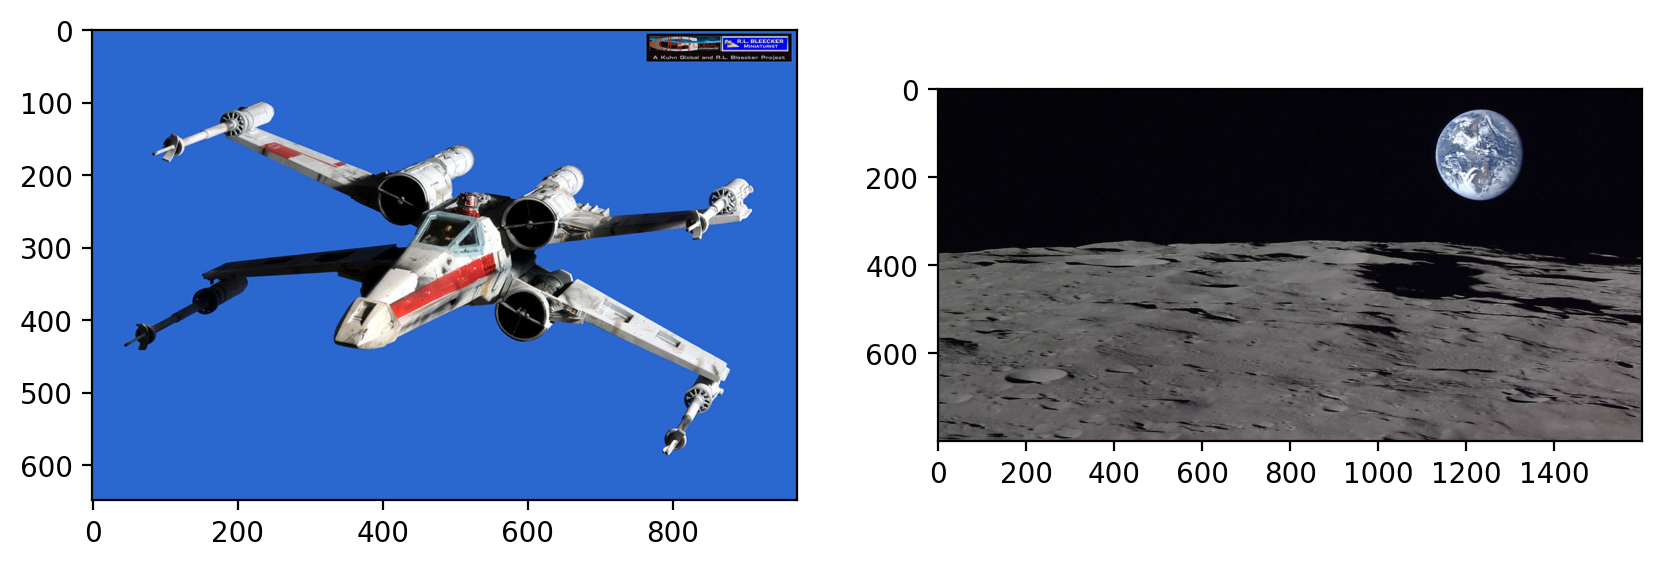

In [68]:
foreground = cv2.imread (path + '2011-04-29_KG_RLB_RED_LEADER-003C_small.jpg')
foreground = cv2.cvtColor (foreground, cv2.COLOR_BGR2RGB)

background = cv2.imread (path + 'landscape-moon.jpg')
background = cv2.cvtColor (background, cv2.COLOR_BGR2RGB)

plt.subplot (1, 2, 1); plt.imshow (foreground)
plt.subplot (1, 2, 2); plt.imshow (background)
print (foreground.shape)
print (background.shape)

In [70]:
new_width_background = background.shape[1]
new_height_background = background.shape[0]
foreground = cv2.resize(foreground, (new_width_background, new_height_background), interpolation=cv2.INTER_LANCZOS4)

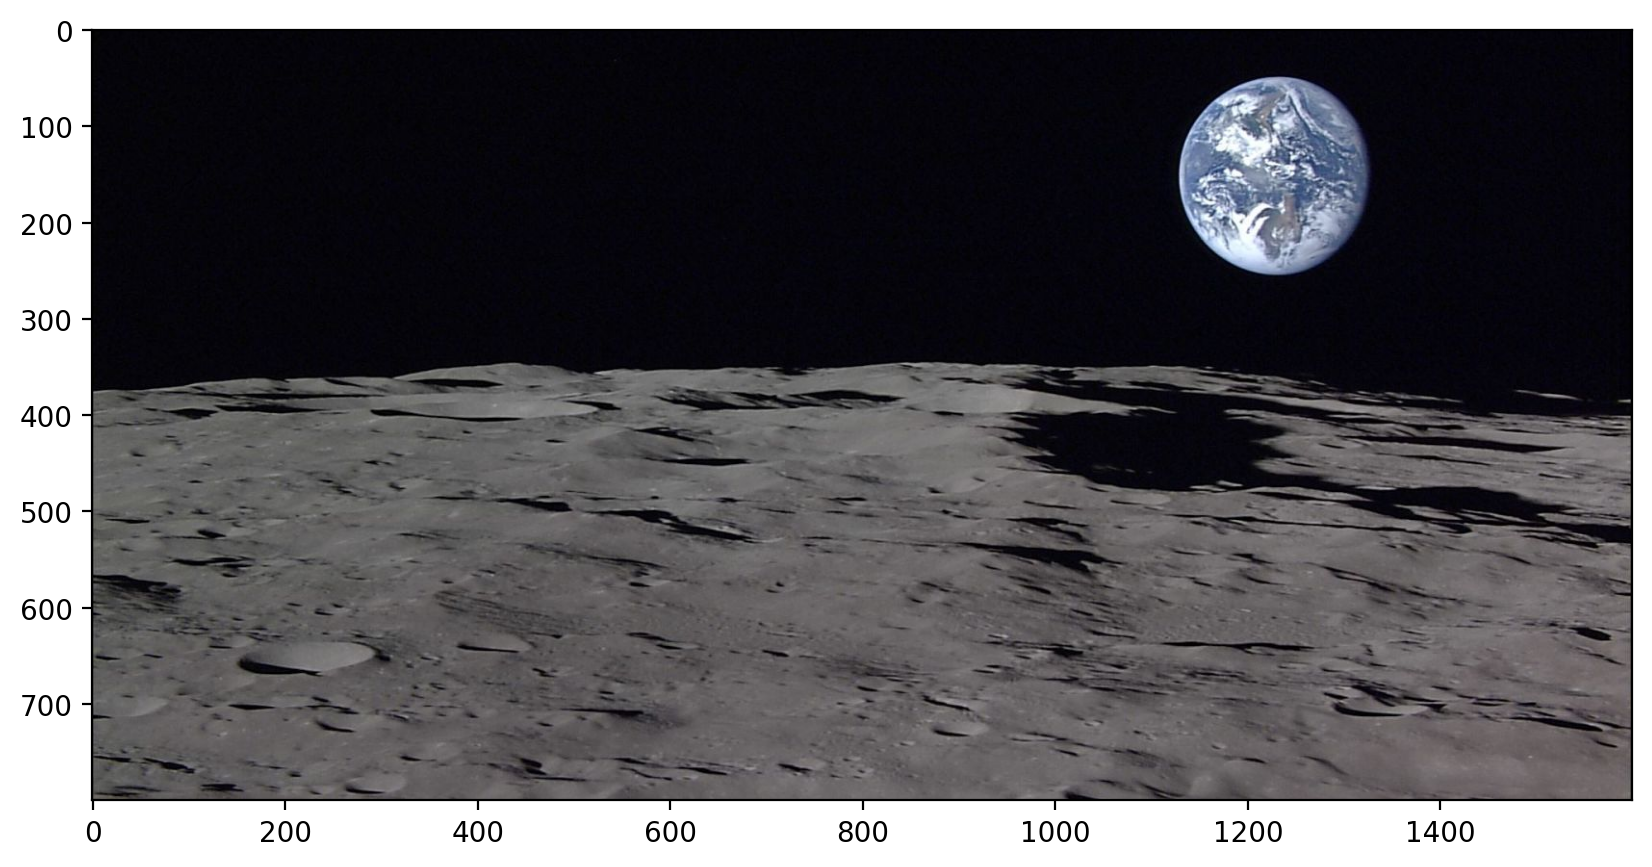

In [71]:
plt.imshow(background)

207


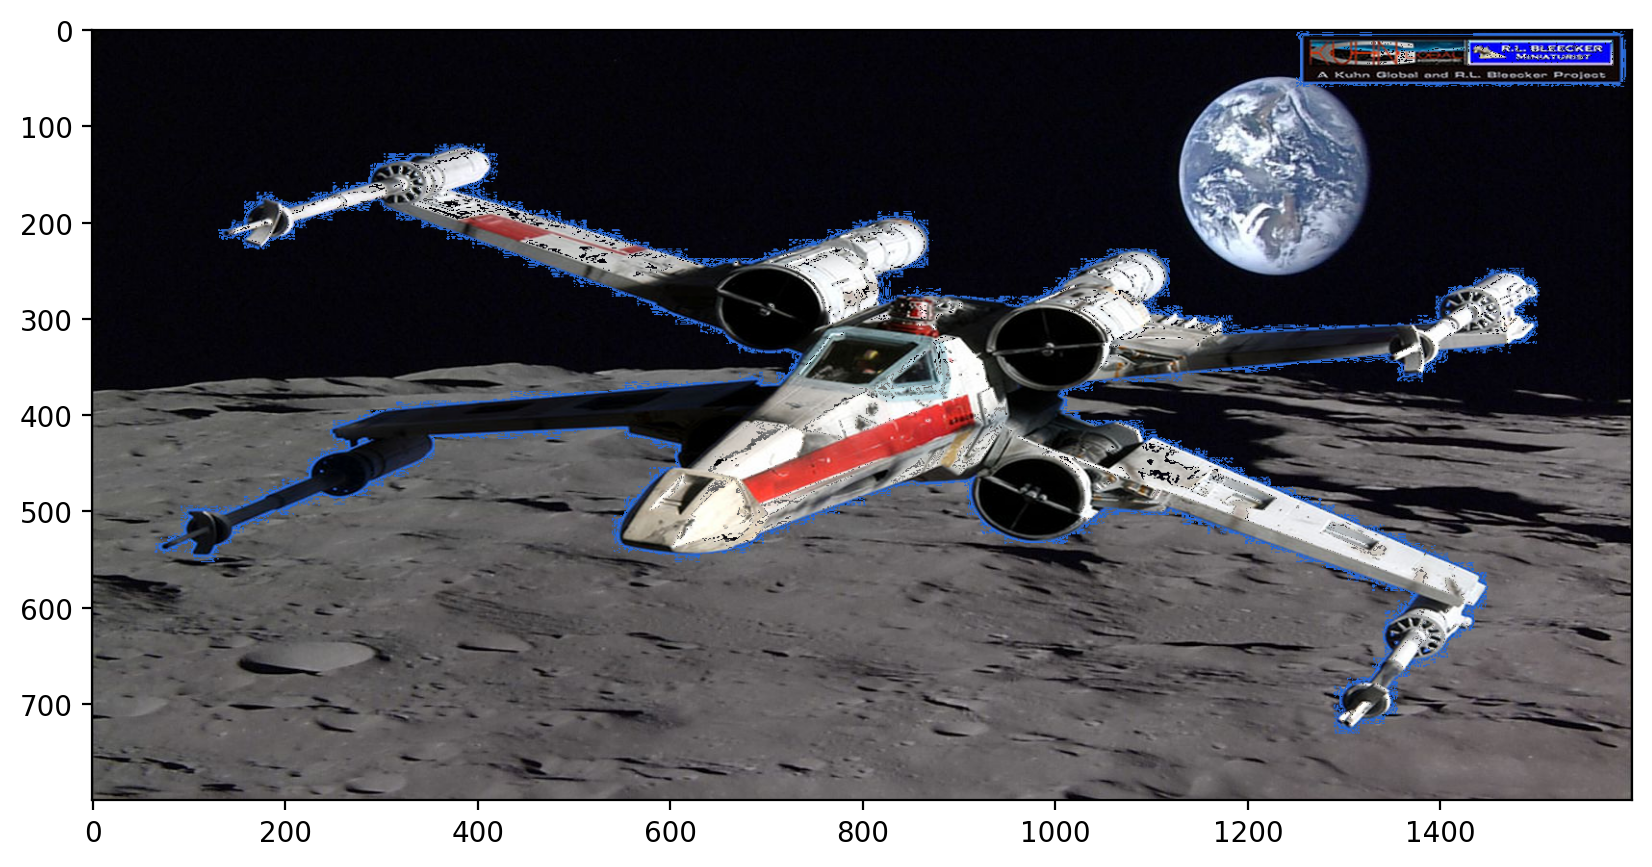

In [72]:
# YOUR CODE HERE
blue_channel = foreground[:, :, 2]
lower_bound = 203
upper_bound = 210
print(blue_channel[10,10])
mask = (blue_channel >= lower_bound) & (blue_channel <= upper_bound)

result = np.where(mask[:, :, None], background, foreground)

plt.imshow(result)

In [73]:
# This should be 0
print(foreground.shape[0] - background.shape[0])
print(foreground.shape[1] - background.shape[1])

# These should be equal
print(foreground.shape)
print(background.shape)

np.testing.assert_equal(foreground.shape, background.shape)

0
0
(800, 1600, 3)
(800, 1600, 3)
